#### Importăm modulele necesare

In [1]:
import signal_processing, data_load, learn, evaluate, render

Using TensorFlow backend.


#### Valorile parametrilor pentru extragerea datelor

In [2]:
num_rows_mfcc = 45
num_cols_mfcc = 130
num_rows_melspec = 32
num_cols_melspec = 110
num_channels = 1
num_labels = 10

num_epochs = 100
num_batch_size = 13
num_speakers = 10
num_seconds = 3.0
n_fft = 2048
hop_length = 1024

#### Creăm modelul 

In [3]:
model = learn.create_model_with_two_inputs(num_labels, num_rows_mfcc, num_cols_mfcc, num_rows_melspec, num_cols_melspec, num_channels)

#### Compilăm modelul

In [4]:
learn.compile(model)

#### Creăm dataframe-urile cu feature-urile obținute (două dataframes, unul cu mfcc, celălalt cu melspectrogram

In [5]:
featuresdf1 = data_load.make_dataframe_class_no(num_speakers, './Dataset/wav/', num_rows_mfcc, num_cols_mfcc, num_seconds)

Finished feature extraction from  970  files


In [6]:
featuresdf2 = data_load.make_dataframe_melspectrogram(num_speakers, './Dataset/wav/', num_rows_melspec, n_fft, hop_length, num_cols_melspec, num_seconds)

Finished feature extraction from  970  files


#### Antrenăm modelul

In [7]:
class_weights = learn.calculate_class_weight(featuresdf1)
history = learn.train_model_two_inputs(model, featuresdf1, featuresdf2, num_rows_mfcc, num_cols_mfcc, num_channels, num_rows_melspec, num_cols_melspec, num_epochs, num_batch_size, 
                                        'CNNTwoInputs', 'default', 'CNNTwoInputs', class_weights)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 776 samples, validate on 194 samples
Epoch 1/100
767/776 [============================>.] - ETA: 0s - loss: 28.8014 - accuracy: 0.1643
Epoch 00001: val_loss improved from inf to 10.01705, saving model to saved_models/weights.best.CNNTwoInputs.hdf5
776/776 [==============================] - 7s 9ms/sample - loss: 28.6020 - accuracy: 0.1637 - val_loss: 10.0170 - val_accuracy: 0.2887
Epoch 2/100
767/776 [============================>.] - ETA: 0s - loss: 9.9616 - accuracy: 0.3286 
Epoch 00002: val_loss improved from 10.01705 to 9.53410, saving model to saved_models/weights.best.CNNTwoInputs.hdf5
776/776 [==============================] - 5s 7ms/sample - loss: 9.9761 - accuracy: 0.3260 - val_loss: 9.5341 - val_accuracy: 0.3196
Epoch 3/100
767/776 [============================>.] - ETA: 0s - loss: 8.7382 - accuracy: 0.3768
Epoch 00003: val_loss improved from 9.53410 to 9.44083, saving model to saved_models/weights.best.CNNTwoInputs.hd

Epoch 25/100
767/776 [============================>.] - ETA: 0s - loss: 3.0040 - accuracy: 0.7823
Epoch 00025: val_loss did not improve from 3.23859
776/776 [==============================] - 5s 7ms/sample - loss: 3.0067 - accuracy: 0.7809 - val_loss: 3.4541 - val_accuracy: 0.8093
Epoch 26/100
767/776 [============================>.] - ETA: 0s - loss: 3.0679 - accuracy: 0.8057
Epoch 00026: val_loss did not improve from 3.23859
776/776 [==============================] - 5s 7ms/sample - loss: 3.0856 - accuracy: 0.8028 - val_loss: 3.4893 - val_accuracy: 0.8247
Epoch 27/100
767/776 [============================>.] - ETA: 0s - loss: 2.9909 - accuracy: 0.7979
Epoch 00027: val_loss did not improve from 3.23859
776/776 [==============================] - 5s 7ms/sample - loss: 2.9887 - accuracy: 0.7977 - val_loss: 3.6006 - val_accuracy: 0.8144
Epoch 28/100
767/776 [============================>.] - ETA: 0s - loss: 2.3867 - accuracy: 0.8331
Epoch 00028: val_loss did not improve from 3.23859
776/7

Epoch 82/100
767/776 [============================>.] - ETA: 0s - loss: 0.7336 - accuracy: 0.9452
Epoch 00082: val_loss did not improve from 1.79777
776/776 [==============================] - 5s 6ms/sample - loss: 0.7324 - accuracy: 0.9446 - val_loss: 2.8475 - val_accuracy: 0.9072
Epoch 83/100
767/776 [============================>.] - ETA: 0s - loss: 0.8197 - accuracy: 0.9413
Epoch 00083: val_loss did not improve from 1.79777
776/776 [==============================] - 5s 6ms/sample - loss: 0.8143 - accuracy: 0.9407 - val_loss: 2.6871 - val_accuracy: 0.8969
Epoch 84/100
767/776 [============================>.] - ETA: 0s - loss: 1.1219 - accuracy: 0.9387
Epoch 00084: val_loss did not improve from 1.79777
776/776 [==============================] - 5s 6ms/sample - loss: 1.1097 - accuracy: 0.9394 - val_loss: 3.6524 - val_accuracy: 0.9021
Epoch 85/100
767/776 [============================>.] - ETA: 0s - loss: 0.3407 - accuracy: 0.9817
Epoch 00085: val_loss did not improve from 1.79777
776/7

In [24]:
result_sets_mfcc = data_load.make_train_test_sets(featuresdf1, num_rows_mfcc, num_cols_mfcc, num_channels)
result_sets_melspec = data_load.make_train_test_sets(featuresdf2, num_rows_melspec, num_cols_melspec, num_channels)

evaluate.evaluate_model_two_inputs(model, 'CNNTwoInputs', result_sets_mfcc, result_sets_melspec)

Training Accuracy:  0.992268
Testing Accuracy:  0.91237116


#### Se observă că chiar dacă acuratețea este aceeași ca și la modelul cu un singur input, pentru clasele 4 și 9 avem valori mult îmbunătățite la celelalte metrici:

In [41]:
evaluate.display_metrics_two_inputs(model, 'CNNTwoInputs', result_sets_mfcc, result_sets_melspec)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.86      1.00      0.92        18
           2       1.00      0.95      0.98        43
           3       0.89      0.80      0.84        20
           4       0.85      0.85      0.85        13
           5       0.93      0.83      0.88        30
           6       0.87      0.93      0.90        14
           7       1.00      1.00      1.00        16
           8       0.71      0.83      0.77        12
           9       0.92      0.92      0.92        12

    accuracy                           0.91       194
   macro avg       0.90      0.91      0.90       194
weighted avg       0.92      0.91      0.91       194

Confusion matrix: 
[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  2 41  0  0  0  0  0  0  0]
 [ 1  0  0 16  0  1  0  0  2  0]
 [ 0  0  0  0 11  0  1  0  0  1]
 [ 0  0  0  1  1 25  1  0  2  0]
 [ 0  0  0  0  0  1 13  

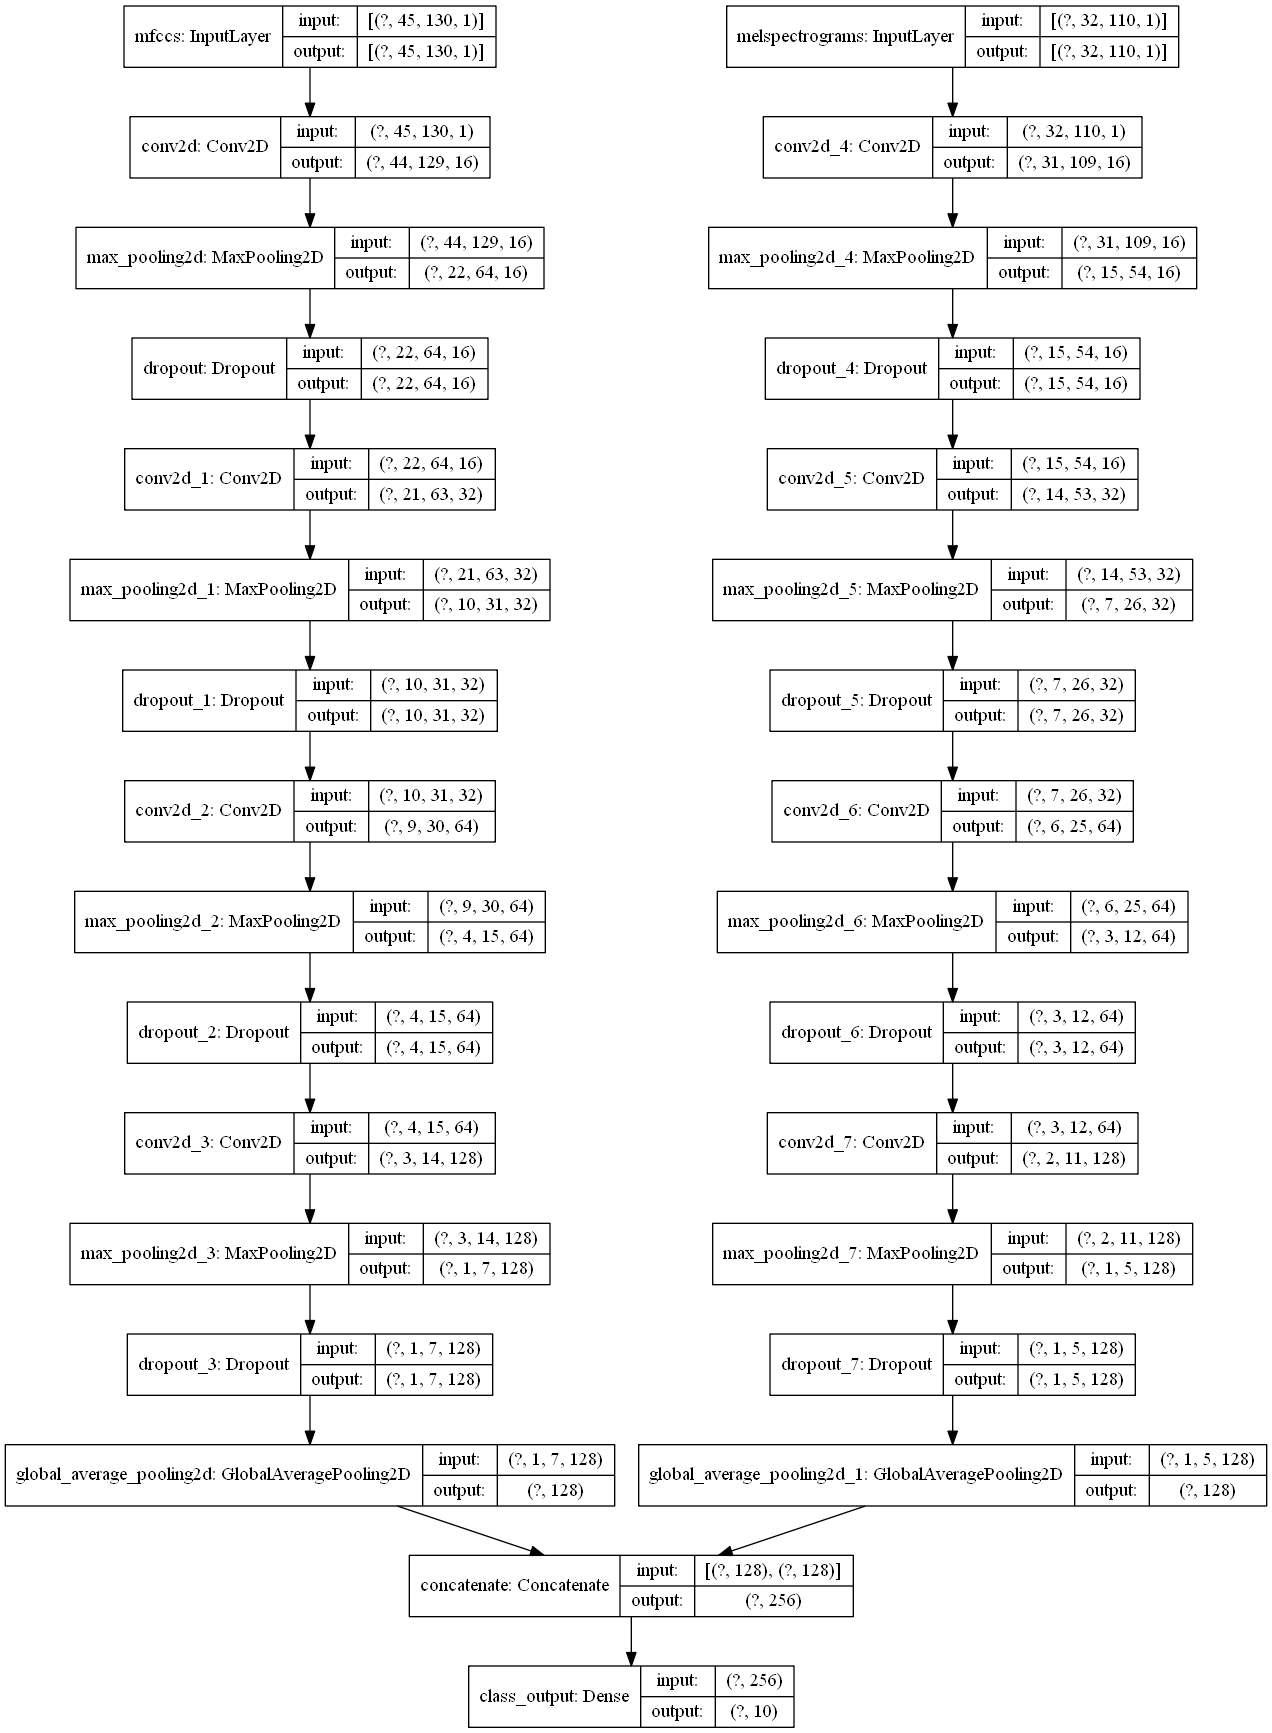

In [5]:
import pydot
import graphviz
import tensorflow.keras.utils
tensorflow.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)